Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

------------------------------------------------------------
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       151
           1       0.58      0.74      0.65        80

    accuracy                           0.72       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.75      0.72      0.73       231

------------------------------------------------------------
Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.79      0.83      0.81    

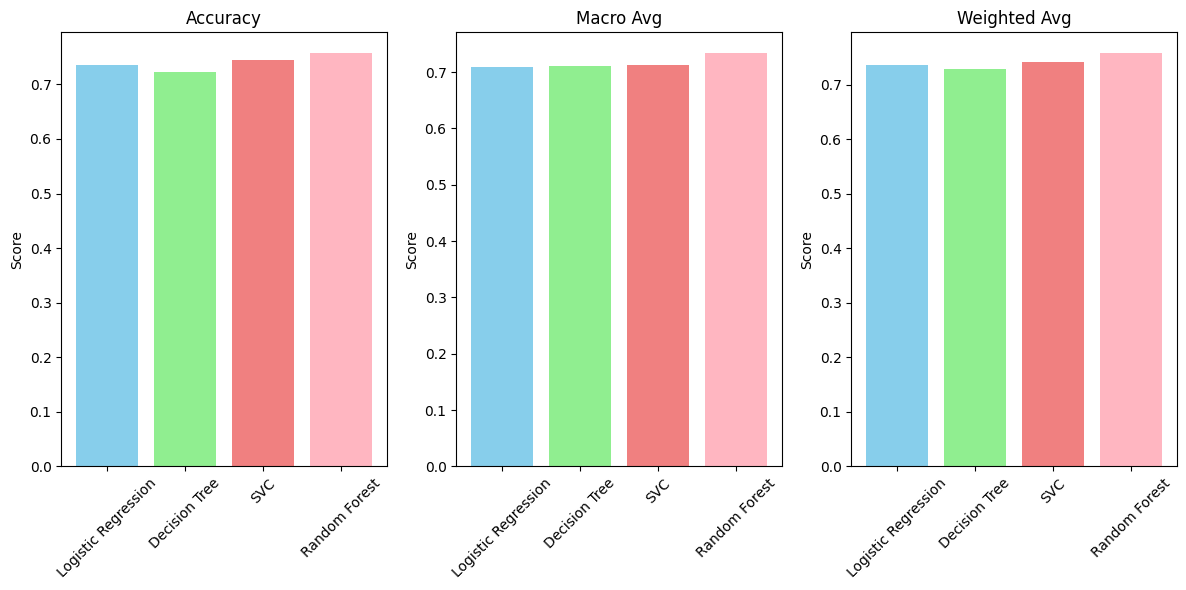

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display first few rows of the dataset
df.head()

# Split the dataset into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Initialize lists to store results
accuracy_list = []
macro_avg_list = []
weighted_avg_list = []

# Iterate over models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract macro avg and weighted avg
    macro_avg = report['macro avg']['f1-score']
    weighted_avg = report['weighted avg']['f1-score']

    macro_avg_list.append(macro_avg)
    weighted_avg_list.append(weighted_avg)

    # Print the classification report for the model
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Plotting the results
metrics = ['Accuracy', 'Macro Avg', 'Weighted Avg']
plt.figure(figsize=(12, 6))

for i, metric in enumerate([accuracy_list, macro_avg_list, weighted_avg_list]):
    plt.subplot(1, 3, i + 1)
    plt.bar(models.keys(), metric, color=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
    plt.title(metrics[i])
    plt.xticks(rotation=45)
    plt.ylabel('Score')

plt.tight_layout()
plt.show()
